# Freeswitch Log pyspark

## Altanai Bisht 
( abisht@seattleu.edu
altanai.telecom.com)

License GPL 3

In [1]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

## 1. Call Record

FreeSWITCH CDRs stored in /usr/local/freeswitch/log/cdr-csv/Master.csv
ref : https://freeswitch.org/confluence/display/FREESWITCH/CDR
and https://freeswitch.org/confluence/display/FREESWITCH/mod_cdr_csv

In [51]:
# logfile = "/fslogs/*.log"
# fslogs = sc.textFile("hdfs://localhost:9000/"+logfile)

from pyspark import SparkFiles

df = spark.read.csv(SparkFiles.get("C:\\Users\\abisht\\FS_logs\\*.csv"), header=False, inferSchema= True)


In [52]:
# Filter : create an RDD containing only those lines that are requests for JPG files
# jpglogs = logs.filter(lambda x: ".jpg" in x)

# for line in jpglogs.take(5):
#     print(line)

In [53]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row
import re

# Example Freeswitch cdr-csv log line:
# "8001","8001","0046423112856","public","2020-06-13 00:58:52","2020-06-13 00:58:52","2020-06-13 00:58:53","1","1","USER_NOT_REGISTERED","f2b05a36-ace2-11ea-aa3b-153da8caf925","","","PCMU","PCMU"
# FS_LOG_PATTERN = '^(\S+) (\S+) (\S+) \[([\w:/]+\s[+\-]\d{4})\] "(\S+) (\S+) (\S+)" (\d{3}) (\d+)'

# def parse_apache_log_line(logline):
#     match = re.search(FS_LOG_PATTERN, logline)
#     if match is None:
#         raise Error("Invalid logline: %s" % logline)
#     return Row(
#         ip_address    = match.group(1),
#         client_identd = match.group(2),
#         user_id       = match.group(3),
#         date = (match.group(4)[:-6]).split(":", 1)[0],
#         time = (match.group(4)[:-6]).split(":", 1)[1],
#         method        = match.group(5),
#         endpoint      = match.group(6),
#         protocol      = match.group(7),
#         response_code = int(match.group(8)),
#         content_size  = int(match.group(9))
#     )

In [54]:
df.head(2)

[Row(_c0='8001', _c1='8001', _c2='0046423112856', _c3='public', _c4='2020-06-13 00:58:52', _c5='2020-06-13 00:58:52', _c6='2020-06-13 00:58:53', _c7=1, _c8='1', _c9='USER_NOT_REGISTERED', _c10='f2b05a36-ace2-11ea-aa3b-153da8caf925', _c11=None, _c12=None, _c13='PCMU', _c14='PCMU'),
 Row(_c0='8001', _c1='8001', _c2='00046423112856', _c3='public', _c4='2020-06-13 00:59:51', _c5='2020-06-13 00:59:51', _c6='2020-06-13 00:59:52', _c7=1, _c8='1', _c9='USER_NOT_REGISTERED', _c10='15d78f5c-ace3-11ea-aa45-153da8caf925', _c11=None, _c12=None, _c13='PCMU', _c14='PCMU')]

In [55]:
# df2 = spark.createDataFrame(df)
# TypeError: data is already a DataFrame

In [56]:
df.show(5)
df.printSchema()

+----+----+---------------+------+-------------------+-------------------+-------------------+---+---+-------------------+--------------------+----+----+----+----+
| _c0| _c1|            _c2|   _c3|                _c4|                _c5|                _c6|_c7|_c8|                _c9|                _c10|_c11|_c12|_c13|_c14|
+----+----+---------------+------+-------------------+-------------------+-------------------+---+---+-------------------+--------------------+----+----+----+----+
|8001|8001|  0046423112856|public|2020-06-13 00:58:52|2020-06-13 00:58:52|2020-06-13 00:58:53|  1|  1|USER_NOT_REGISTERED|f2b05a36-ace2-11e...|null|null|PCMU|PCMU|
|8001|8001| 00046423112856|public|2020-06-13 00:59:51|2020-06-13 00:59:51|2020-06-13 00:59:52|  1|  1|USER_NOT_REGISTERED|15d78f5c-ace3-11e...|null|null|PCMU|PCMU|
|8001|8001|000046903433905|public|2020-06-13 01:00:13|2020-06-13 01:00:13|2020-06-13 01:00:14|  1|  1|USER_NOT_REGISTERED|22d77398-ace3-11e...|null|null|PCMU|PCMU|
|8001|8001|90004

In [57]:
df.show(1, vertical=True)

-RECORD 0--------------------
 _c0  | 8001                 
 _c1  | 8001                 
 _c2  | 0046423112856        
 _c3  | public               
 _c4  | 2020-06-13 00:58:52  
 _c5  | 2020-06-13 00:58:52  
 _c6  | 2020-06-13 00:58:53  
 _c7  | 1                    
 _c8  | 1                    
 _c9  | USER_NOT_REGISTERED  
 _c10 | f2b05a36-ace2-11e... 
 _c11 | null                 
 _c12 | null                 
 _c13 | PCMU                 
 _c14 | PCMU                 
only showing top 1 row



**DataFrame.collect()** collects the distributed data to the driver side as the local data in Python. Note that this can throw an out-of-memory error when the dataset is too large to fit in the driver side because it collects all the data from executors to the driver side.

In [58]:
df.collect()

[Row(_c0='8001', _c1='8001', _c2='0046423112856', _c3='public', _c4='2020-06-13 00:58:52', _c5='2020-06-13 00:58:52', _c6='2020-06-13 00:58:53', _c7=1, _c8='1', _c9='USER_NOT_REGISTERED', _c10='f2b05a36-ace2-11ea-aa3b-153da8caf925', _c11=None, _c12=None, _c13='PCMU', _c14='PCMU'),
 Row(_c0='8001', _c1='8001', _c2='00046423112856', _c3='public', _c4='2020-06-13 00:59:51', _c5='2020-06-13 00:59:51', _c6='2020-06-13 00:59:52', _c7=1, _c8='1', _c9='USER_NOT_REGISTERED', _c10='15d78f5c-ace3-11ea-aa45-153da8caf925', _c11=None, _c12=None, _c13='PCMU', _c14='PCMU'),
 Row(_c0='8001', _c1='8001', _c2='000046903433905', _c3='public', _c4='2020-06-13 01:00:13', _c5='2020-06-13 01:00:13', _c6='2020-06-13 01:00:14', _c7=1, _c8='1', _c9='USER_NOT_REGISTERED', _c10='22d77398-ace3-11ea-aa4f-153da8caf925', _c11=None, _c12=None, _c13='PCMU', _c14='PCMU'),
 Row(_c0='8001', _c1='8001', _c2='900046184445688', _c3='public', _c4='2020-06-13 01:00:36', _c5='2020-06-13 01:00:36', _c6='2020-06-13 01:00:37', _c7=

**Groupby** Group by call duartion 

In [59]:
df.groupby('_c7').avg().show()

+----+--------+
| _c7|avg(_c7)|
+----+--------+
|  12|    12.0|
|   1|     1.0|
|  13|    13.0|
|   6|     6.0|
|   3|     3.0|
|   5|     5.0|
|   9|     9.0|
|  17|    17.0|
|   4|     4.0|
|   8|     8.0|
|   7|     7.0|
|  10|    10.0|
|  29|    29.0|
|  32|    32.0|
|  11|    11.0|
|  33|    33.0|
|   2|     2.0|
|   0|     0.0|
|1025|  1025.0|
|  31|    31.0|
+----+--------+
only showing top 20 rows



## 1.a RDD creation

PySpark RDD Benefits 
- In-Memory Processing
- Immutability
- Fault Tolerance
- Lazy Evolution
- Partitioning

In [60]:
##  RDD using sparkContext.textFile()
# spark.sparkContext.addFile(url)
# rdd=spark.sparkContext.parallelize(df)

rdd = spark.sparkContext.textFile("C:\\Users\\abisht\\FS_logs\\*.csv")

In [61]:
print("initial partition count:"+str(rdd.getNumPartitions()))

initial partition count:2


In [62]:
print(rdd.collect())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [63]:
## Repartition and Coalesce -  shuffles data from all nodes 
# reparRdd = rdd.repartition(4)
# print("re-partition count:"+str(reparRdd.getNumPartitions()))

### 1.b Using map-reduce RDD Transformations 

lambda to count the number of requests each 15 mins

In [64]:
## flatMap – flatMap() transformation flattens the RDD

rdd2 = rdd.flatMap(lambda x: x.split(","))

In [65]:
print(rdd2.collect())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [66]:
##  map() transformation

rdd3 = rdd2.map(lambda x[4]: (x,1))

SyntaxError: invalid syntax (Temp/ipykernel_15560/1635476587.py, line 3)

In [ ]:
# calltraffic = logs.map(lambda row:(row[1],1)).reduceByKey(lambda a,b:a+b)

In [67]:
from pyspark.sql.functions import date_format

df2 = df.withColumn('startTime', date_format('_c4', 'YYYY-MM-DD  HH:mm:ss'))
df2["startTime"].show()

TypeError: 'Column' object is not callable

In [68]:
df2.head()
# df2["startTime"].head(2)

Py4JJavaError: An error occurred while calling o241.collectToPython.
: org.apache.spark.SparkUpgradeException: You may get a different result due to the upgrading of Spark 3.0: Fail to recognize 'YYYY-MM-DD  HH:mm:ss' pattern in the DateTimeFormatter. 1) You can set spark.sql.legacy.timeParserPolicy to LEGACY to restore the behavior before Spark 3.0. 2) You can form a valid datetime pattern with the guide from https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failToRecognizePatternAfterUpgradeError(QueryExecutionErrors.scala:936)
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper$$anonfun$checkLegacyFormatter$1.applyOrElse(DateTimeFormatterHelper.scala:187)
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper$$anonfun$checkLegacyFormatter$1.applyOrElse(DateTimeFormatterHelper.scala:180)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.sql.catalyst.util.Iso8601TimestampFormatter.validatePatternString(TimestampFormatter.scala:153)
	at org.apache.spark.sql.catalyst.util.TimestampFormatter$.getFormatter(TimestampFormatter.scala:351)
	at org.apache.spark.sql.catalyst.util.TimestampFormatter$.apply(TimestampFormatter.scala:394)
	at org.apache.spark.sql.catalyst.expressions.TimestampFormatterHelper.getFormatter(datetimeExpressions.scala:90)
	at org.apache.spark.sql.catalyst.expressions.TimestampFormatterHelper.getFormatter$(datetimeExpressions.scala:84)
	at org.apache.spark.sql.catalyst.expressions.DateFormatClass.getFormatter(datetimeExpressions.scala:892)
	at org.apache.spark.sql.catalyst.expressions.TimestampFormatterHelper.$anonfun$formatterOption$1(datetimeExpressions.scala:81)
	at scala.Option.map(Option.scala:230)
	at org.apache.spark.sql.catalyst.expressions.TimestampFormatterHelper.formatterOption(datetimeExpressions.scala:81)
	at org.apache.spark.sql.catalyst.expressions.TimestampFormatterHelper.formatterOption$(datetimeExpressions.scala:79)
	at org.apache.spark.sql.catalyst.expressions.DateFormatClass.formatterOption$lzycompute(datetimeExpressions.scala:892)
	at org.apache.spark.sql.catalyst.expressions.DateFormatClass.formatterOption(datetimeExpressions.scala:892)
	at org.apache.spark.sql.catalyst.expressions.DateFormatClass.doGenCode(datetimeExpressions.scala:911)
	at org.apache.spark.sql.catalyst.expressions.Expression.$anonfun$genCode$3(Expression.scala:151)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.catalyst.expressions.Expression.genCode(Expression.scala:146)
	at org.apache.spark.sql.catalyst.expressions.Alias.genCode(namedExpressions.scala:171)
	at org.apache.spark.sql.execution.ProjectExec.$anonfun$doConsume$2(basicPhysicalOperators.scala:73)
	at scala.collection.immutable.List.map(List.scala:297)
	at org.apache.spark.sql.execution.ProjectExec.$anonfun$doConsume$1(basicPhysicalOperators.scala:73)
	at org.apache.spark.sql.catalyst.expressions.codegen.CodegenContext.withSubExprEliminationExprs(CodeGenerator.scala:1039)
	at org.apache.spark.sql.execution.ProjectExec.doConsume(basicPhysicalOperators.scala:73)
	at org.apache.spark.sql.execution.CodegenSupport.consume(WholeStageCodegenExec.scala:195)
	at org.apache.spark.sql.execution.CodegenSupport.consume$(WholeStageCodegenExec.scala:150)
	at org.apache.spark.sql.execution.InputAdapter.consume(WholeStageCodegenExec.scala:497)
	at org.apache.spark.sql.execution.InputRDDCodegen.doProduce(WholeStageCodegenExec.scala:484)
	at org.apache.spark.sql.execution.InputRDDCodegen.doProduce$(WholeStageCodegenExec.scala:457)
	at org.apache.spark.sql.execution.InputAdapter.doProduce(WholeStageCodegenExec.scala:497)
	at org.apache.spark.sql.execution.CodegenSupport.$anonfun$produce$1(WholeStageCodegenExec.scala:96)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:222)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:219)
	at org.apache.spark.sql.execution.CodegenSupport.produce(WholeStageCodegenExec.scala:91)
	at org.apache.spark.sql.execution.CodegenSupport.produce$(WholeStageCodegenExec.scala:91)
	at org.apache.spark.sql.execution.InputAdapter.produce(WholeStageCodegenExec.scala:497)
	at org.apache.spark.sql.execution.ProjectExec.doProduce(basicPhysicalOperators.scala:54)
	at org.apache.spark.sql.execution.CodegenSupport.$anonfun$produce$1(WholeStageCodegenExec.scala:96)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:222)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:219)
	at org.apache.spark.sql.execution.CodegenSupport.produce(WholeStageCodegenExec.scala:91)
	at org.apache.spark.sql.execution.CodegenSupport.produce$(WholeStageCodegenExec.scala:91)
	at org.apache.spark.sql.execution.ProjectExec.produce(basicPhysicalOperators.scala:41)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doCodeGen(WholeStageCodegenExec.scala:659)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:722)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:184)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:222)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:219)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:325)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:443)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:429)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:48)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3538)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3706)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3704)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3535)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.IllegalArgumentException: All week-based patterns are unsupported since Spark 3.0, detected: Y, Please use the SQL function EXTRACT instead
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper$.$anonfun$convertIncompatiblePattern$4(DateTimeFormatterHelper.scala:319)
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper$.$anonfun$convertIncompatiblePattern$4$adapted(DateTimeFormatterHelper.scala:317)
	at scala.collection.TraversableLike$WithFilter.$anonfun$foreach$1(TraversableLike.scala:985)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.immutable.StringOps.foreach(StringOps.scala:33)
	at scala.collection.TraversableLike$WithFilter.foreach(TraversableLike.scala:984)
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper$.$anonfun$convertIncompatiblePattern$2(DateTimeFormatterHelper.scala:317)
	at scala.collection.TraversableLike.$anonfun$map$1(TraversableLike.scala:286)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:198)
	at scala.collection.TraversableLike.map(TraversableLike.scala:286)
	at scala.collection.TraversableLike.map$(TraversableLike.scala:279)
	at scala.collection.mutable.ArrayOps$ofRef.map(ArrayOps.scala:198)
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper$.convertIncompatiblePattern(DateTimeFormatterHelper.scala:314)
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper.getOrCreateFormatter(DateTimeFormatterHelper.scala:121)
	at org.apache.spark.sql.catalyst.util.DateTimeFormatterHelper.getOrCreateFormatter$(DateTimeFormatterHelper.scala:117)
	at org.apache.spark.sql.catalyst.util.Iso8601TimestampFormatter.getOrCreateFormatter(TimestampFormatter.scala:92)
	at org.apache.spark.sql.catalyst.util.Iso8601TimestampFormatter.formatter$lzycompute(TimestampFormatter.scala:101)
	at org.apache.spark.sql.catalyst.util.Iso8601TimestampFormatter.formatter(TimestampFormatter.scala:100)
	at org.apache.spark.sql.catalyst.util.Iso8601TimestampFormatter.validatePatternString(TimestampFormatter.scala:152)
	... 74 more


### Number of unique daily Callers

In [92]:
host_day_df = df.select(df['_c1'],
                             F.dayofmonth('_c4').alias('day'))
host_day_df.show(5, truncate=False)

+----+---+
|_c1 |day|
+----+---+
|8001|13 |
|8001|13 |
|8001|13 |
|8001|13 |
|8001|13 |
+----+---+
only showing top 5 rows



**host_day_distinct_df**

In [94]:
def_mr = pd.get_option('max_rows')
pd.set_option('max_rows', 10)

daily_hosts_df = (host_day_df
                     .groupBy('day')
                     .count()
                     .sort("day"))

daily_hosts_df = daily_hosts_df.toPandas()
daily_hosts_df

,day,count
0,NaN,1
1,2.0,35
2,13.0,18104
3,14.0,3282
4,21.0,393
5,22.0,68
6,23.0,3


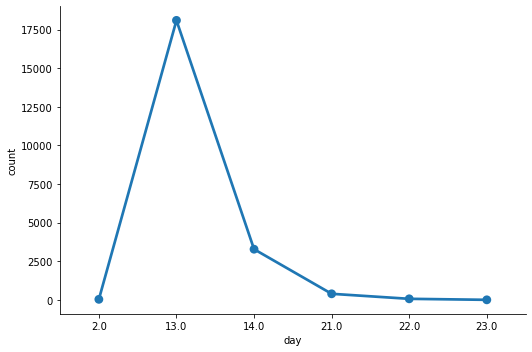

In [95]:
c = sns.catplot(x='day', y='count',
                data=daily_hosts_df,
                kind='point', height=5,
                aspect=1.5)

## Average number of daily Calls per Caller 

In [98]:
daily_hosts_df = (host_day_df
                     .groupBy('day')
                     .count()
                     .select(col("day"),col("count").alias("total_hosts")))

total_daily_reqests_df = (df
                      .select(F.dayofmonth("time").alias("day"))
                      .groupBy("day")
                      .count()
                      .select(col("day"), col("count").alias("total_reqs")))

avg_daily_reqests_per_host_df = total_daily_reqests_df.join(daily_hosts_df, 'day')
avg_daily_reqests_per_host_df = (avg_daily_reqests_per_host_df
                                    .withColumn('avg_reqs', col('total_reqs') / col('total_hosts'))
                                    .sort("day"))
avg_daily_reqests_per_host_df = avg_daily_reqests_per_host_df.toPandas()
avg_daily_reqests_per_host_df

NameError: name 'col' is not defined

In [ ]:
c = sns.catplot(x='day', y='avg_reqs',
                data=avg_daily_reqests_per_host_df,
                kind='point', height=5, aspect=1.5)

## 4.2 Processing Durations 

Calculating Ring Start

ring_start_time = progress_time + progress_media_time

PDD (post-dial delay) is the period of silence between the call starting and the call ringing, therefore for calls that ring:

pdd = ring_start_time - created_time

Calculating Call Duration
length_of_talk_time = hangup_time - answered_time

Calculating Ring Duration
if ( answered_time == 0 ) then
    length_of_phone_ringing = hangup_time - created_time
else
    length_of_phone_ringing = answered_time - created_time
end

In [79]:
from pyspark.sql import functions as F

(calldf.agg(F.min(calldf['duration']).alias('min_content_size'),
            F.max(calldf['duration']).alias('max_content_size'),
            F.mean(calldf['duration']).alias('mean_content_size'),
            F.stddev(calldf['duration']).alias('std_content_size'),
            F.count(calldf['duration']).alias('count_content_size'))
        .toPandas())

TypeError: Invalid argument, not a string or column: 0         1
1         1
2         1
3         1
4         1
         ..
21881     0
21882    64
21883     0
21884     9
21885    70
Name: duration, Length: 21886, dtype: int32 of type <class 'pandas.core.series.Series'>. For column literals, use 'lit', 'array', 'struct' or 'create_map' function.

## 4.3  Call Hangup/status code analysis

In [85]:
status_freq_df = (df.groupBy('_c9')
                     .count()
                     .sort('_c9')
                     .cache())
print('Total distinct HTTP Status Codes:', status_freq_df.count())   

Total distinct HTTP Status Codes: 10


In [86]:
status_freq_pd_df = (status_freq_df
                         .toPandas()
                         .sort_values(by=['count'],
                                      ascending=False))
status_freq_pd_df

,_c9,count
8,USER_NOT_REGISTERED,20845
3,NORMAL_CLEARING,440
5,NO_ROUTE_DESTINATION,408
4,NORMAL_UNSPECIFIED,126
1,INCOMPATIBLE_DESTINATION,16
7,USER_BUSY,16
0,CALL_REJECTED,14
2,MANDATORY_IE_MISSING,13
6,ORIGINATOR_CANCEL,7
9,fe314a6c-a9a4-11ec-b524-c9b8cbe5d252,1


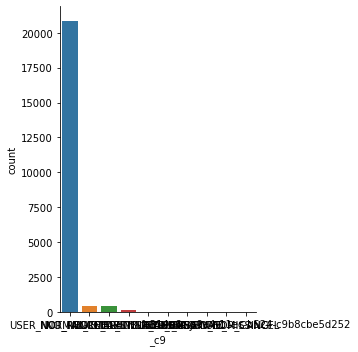

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.catplot(x='_c9', y='count', data=status_freq_pd_df,
            kind='bar', 
            order=status_freq_pd_df['_c9'])

## Counting NORMAL_CLEARING response codes

In [100]:
normal_clearing_df = df.filter(df["_c9"] == 'NORMAL_CLEARING').cache()
print(('Total NORMAL_CLEARING hangupcode: {}').format(normal_clearing_df.count()))

Total NORMAL_CLEARING hangupcode: 440


In [102]:
# Top 20 normal clearings
normal_clearing_count_df = (normal_clearing_df
                          .groupBy("_c1")
                          .count()
                          .sort("count", ascending=False)
                          .limit(20))

normal_clearing_count_df.show(truncate=False)

+-------+-----+
|_c1    |count|
+-------+-----+
|altanai|54   |
|1001   |38   |
|default|31   |
|1006   |11   |
|1008   |11   |
|1004   |11   |
|1010   |11   |
|1007   |11   |
|1005   |11   |
|1009   |11   |
|1002   |11   |
|1003   |10   |
|1000   |7    |
|6001   |7    |
|7001   |7    |
|5001   |6    |
|2001   |6    |
|3001   |5    |
|8001   |5    |
|4001   |5    |
+-------+-----+



## normal_clearings per day

In [105]:
normal_clearing_perday_df = (normal_clearing_df
                                .groupBy(F.dayofmonth('_c4').alias('day'))
                                .count()
                                .sort("day"))

normal_clearing_perday_pd_df = normal_clearing_perday_df.toPandas()
normal_clearing_perday_pd_df

,day,count
0,2,8
1,13,197
2,14,187
3,21,2
4,22,45
5,23,1


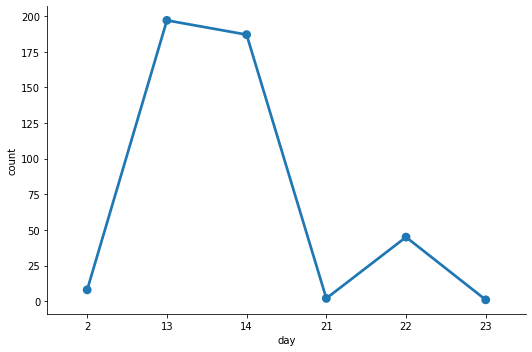

In [106]:
c = sns.catplot(x='day', y='count',
                data=normal_clearing_perday_pd_df,
                kind='point', height=5, aspect=1.5)

## Top three days for normal clearning 

In [108]:
(normal_clearing_count_df
    .sort("count", ascending=False)
    .show(3))

+-------+-----+
|    _c1|count|
+-------+-----+
|altanai|   54|
|   1001|   38|
|default|   31|
+-------+-----+
only showing top 3 rows



## Hourly normal clearings

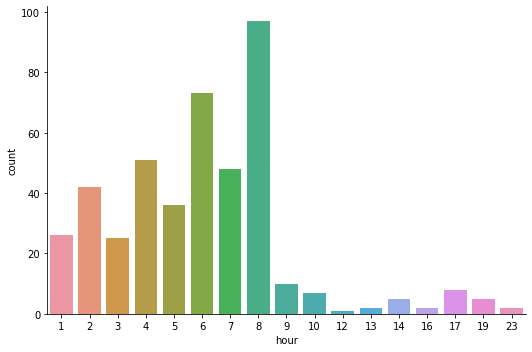

In [110]:
hourly_avg_normal_clearing_df = (normal_clearing_df
                                   .groupBy(F.hour('_c4').alias('hour'))
                                   .count()
                                   .sort('hour'))
hourly_avg_normal_clearing_pd_df = hourly_avg_normal_clearing_df.toPandas()

c = sns.catplot(x='hour', y='count',
                data=hourly_avg_normal_clearing_pd_df,
                kind='bar', height=5, aspect=1.5)

##   Caller / Call Destinations

In [89]:
host_sum_df =(df
               .groupBy('_c2')
               .count()
               .sort('count', ascending=False).limit(10))

host_sum_df.show(truncate=False)

+---------------+-----+
|_c2            |count|
+---------------+-----+
|00441942934026 |261  |
|+441942934026  |260  |
|900441157940243|259  |
|000441157940243|259  |
|00046462607512 |80   |
|0046462607512  |79   |
|90046462607512 |79   |
|0046903433905  |75   |
|90046903433905 |74   |
|00046903433905 |74   |
+---------------+-----+



In [90]:
host_sum_pd_df = host_sum_df.toPandas()
host_sum_pd_df.iloc[8]['_c2']

'90046903433905'

**Refs**
- https://opensource.com/article/19/5/visualize-log-data-apache-spark